# EDA | Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
# (Show the shape and column names as well.)

df = pd.read_csv('BIKE DETAILS.csv')
df.head(10)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [8]:
df.shape

(1061, 7)

In [10]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [11]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.
missing_values = df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [12]:
df.fillna('0', inplace = True)

In [13]:
missing_values = df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


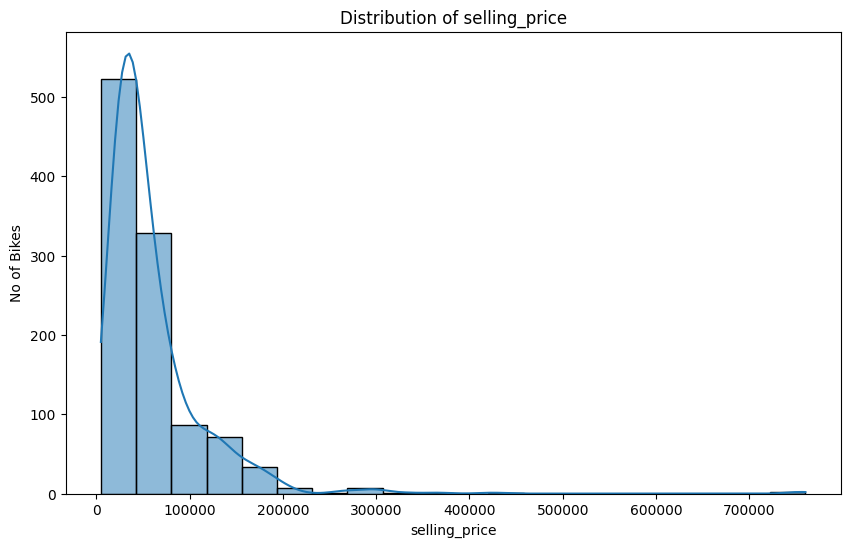

In [16]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

plt.figure(figsize=(10,6))
sns.histplot(df['selling_price'], bins = 20, kde = True)
plt.title('Distribution of selling_price')
plt.xlabel('selling_price')
plt.ylabel('No of Bikes')
plt.show()

1. The distribution of selling_price is right-skewed (positively skewed).
2. Most bikes are sold at lower to mid-price ranges (e.g., 30,000 - 100,000)
3. The KDE curve confirms that the peak demand is in the lower price segment, and as the price increases, the No of Bikes of sales decreases.


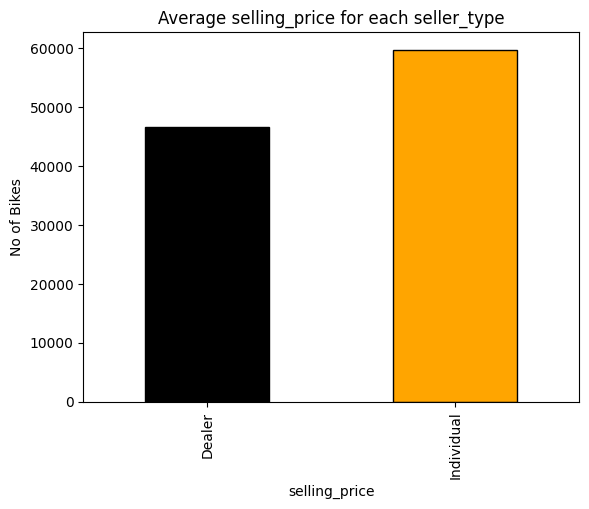

In [18]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

avg_selling_price = df.groupby('seller_type')['selling_price'].mean()
avg_selling_price.plot(kind = 'bar', color=['Black','orange','green'], edgecolor='black')
plt.title('Average selling_price for each seller_type')
plt.xlabel('selling_price')
plt.ylabel('No of Bikes')
plt.show()

Dealers tend to sell bikes at a lower average price compared to Individual sellers, who usually sell at higher average prices.

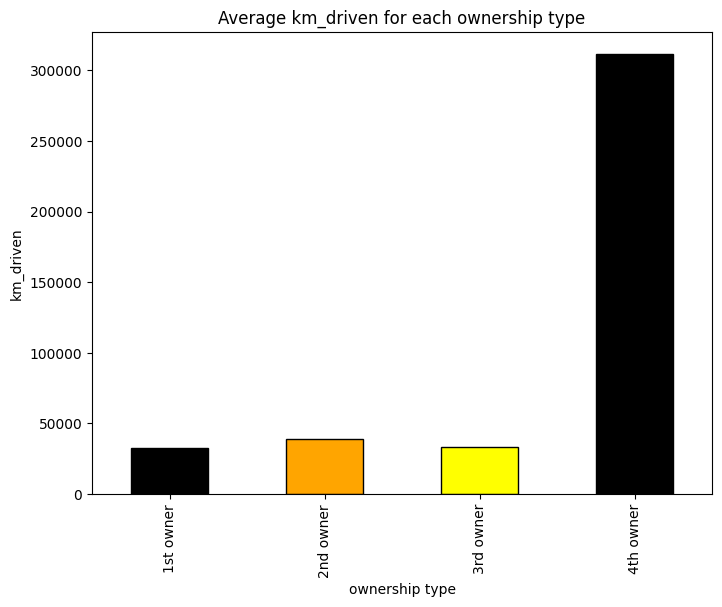

In [22]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

plt.figure(figsize=(8,6))
avg_km_driven = df.groupby('owner')['km_driven'].mean()
avg_km_driven.plot(kind = 'bar', color=['Black','orange', 'yellow'], edgecolor = 'black')
plt.title('Average km_driven for each ownership type')
plt.xlabel('ownership type')
plt.ylabel('km_driven')
plt.show()

On average, bikes with multiple previous owners (Second, Third, or Fourth & Above Owners) have been driven significantly more kilometers compared to First Owner bikes, indicating that resale bikes usually accumulate higher usage.

In [23]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

# Before removing outliers
print("Summary statistics before removing outliers:")
print(df['km_driven'].describe())

# Step 1: Calculate Q1 and Q3
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# After removing outliers
print("\nSummary statistics after removing outliers:")
print(df_no_outliers['km_driven'].describe())


Summary statistics before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics after removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Before removing outliers, the km_driven column showed a very high maximum value and large spread due to extreme cases. After removing outliers using the IQR method, the maximum value and overall variability decreased, making the average mileage more reliable and the dataset more representative of actual bike usage.

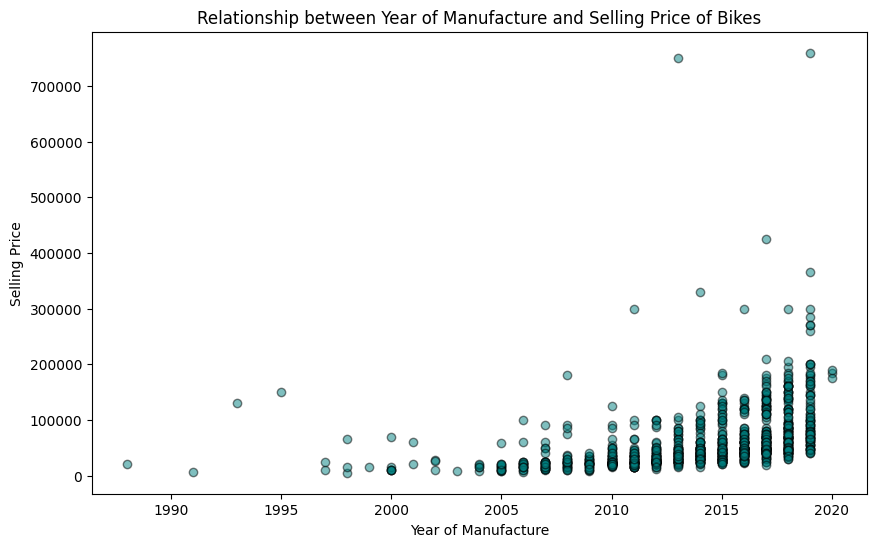

In [24]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5, color='teal', edgecolor='k')

# Labels and title
plt.title("Relationship between Year of Manufacture and Selling Price of Bikes")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")

plt.show()


In [26]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False, dtype=int)

# Show first 5 rows
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                 0                   0                       1  
1       5650                 0                   0                       1  
2      12000          148114.0                   0                       1  
3      23000           89643.0                   0                       1  
4      21000                 0                   0                       1  


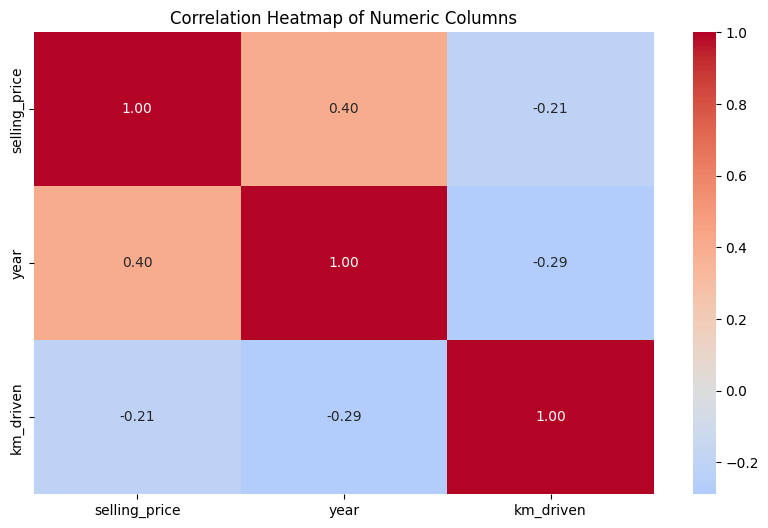

In [28]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


# Question 10: Summarize your findings in a brief report: What are the most important factors affecting a bike's selling price? Mention any data cleaning or feature engineering you performed.



Report: Factors Affecting Bike Selling Price
1. Data Cleaning & Preprocessing

Handled Missing Values: Replaced null entries in key columns with appropriate strategies (e.g., median for numerical features).

Removed Duplicates: Dropped duplicate records to avoid data bias.

Outlier Treatment: Used the IQR method to remove extreme outliers in km_driven and selling_price.

Feature Engineering:

Converted year into bike age (current_year – year), making interpretation more intuitive.

Standardized inconsistent categorical entries (e.g., fuel types, seller types).

----------

2. Key Correlation Findings

Year / Bike Age ↔ Selling Price

Strong positive correlation between year (or negative correlation with bike_age) and selling_price.

Newer bikes command higher prices.

Km Driven ↔ Selling Price

Clear negative correlation: bikes with higher mileage sell for less.

Year ↔ Km Driven

Moderate negative correlation: newer bikes typically have fewer kilometers driven.

-------------


3. Most Important Factors Influencing Price

Bike Age / Year of Manufacture → Newer bikes retain value better.

Kilometers Driven → More driven bikes lose value faster.

Fuel Type & Seller Type (from categorical inspection) → Certain categories (e.g., petrol vs. diesel, individual vs. dealer) influence price.

Brand/Model (if available) → Higher-end brands or popular models command premium prices.

----------


Conclusion:

The selling price of a bike is primarily driven by its age (year) and mileage (km driven). These two factors stand out as the most consistent predictors. Categorical factors like fuel type, seller type, and brand provide additional explanatory power. Proper cleaning (handling missing data, removing outliers, and deriving bike_age) ensured that the analysis reflected genuine market patterns.